# Is there a salary difference between number of appearances? 

## Import the required packages, data, and clean the data

In [32]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
exec(open("../Scripts/Data_Cleaning.py").read())


Data organization for this research question

In [33]:
Analysis = Salary_Analysis.loc[:, ['salary', 'G_all'] ]
Analysis['salary'] = Analysis['salary']/1000000
#Pivot for Analysis
Pivot = Analysis.pivot(columns='G_all', values='salary')

## Manually examine the differences in the group

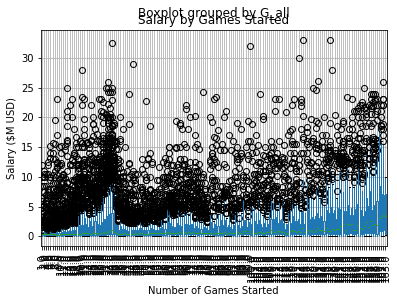

In [34]:
Analysis.boxplot(by = 'G_all', rot=90)
plt.title('Salary by Games Started')
plt.xlabel('Number of Games Started')
plt.ylabel('Salary ($M USD)')
plt.show()

## Use statistical testing to confirm the variance

Set the significance value before any testing. 

In [35]:
alpha_value = 0.001
independent = True

Combined Statistical Testing Workflow

In [36]:
exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

Comparing Standard Deviations

T-statistic: 810692.474186
P-Value: 0.0
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.60606364293e-12
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 2396.05486464
P-Value: 0.0

Reject NULL hypothesis - Significant differences exist between groups.


If variable is statistically significant, append to file for further investigation

In [38]:
if Sig == True: 
    columns = list(Analysis)
    Capstone_csv = pd.read_csv("../Data/Capstone.csv")
    Capstone_csv[columns] = Salary_Analysis[columns]
    Capstone_csv.to_csv("../Data/Capstone.csv")